# ASSIGNMENT ON STATISTICS

In [45]:
import numpy as np
import pandas as pd

# 1) Read data

In [4]:
df = pd.read_csv("Students_Performance.csv")

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# 1a) Males and Females participated in the test

In [6]:
gender = df["gender"].value_counts()

In [7]:
gender

female    518
male      482
Name: gender, dtype: int64

# 1b) Students' Parental level of Education

In [33]:
df["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

# 1 c (i)average for math, reading and writing based on Gender

In [18]:
Avg_gender= df[["gender","math score","reading score","writing score"]].groupby("gender").mean()

In [19]:
Avg_gender

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


# 1 c (ii)average for math, reading and writing based on test preparation course

In [20]:
Avg_test=df[["test preparation course","math score","reading score","writing score"]].groupby("test preparation course").mean()

In [21]:
Avg_test

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


# 1d(i) the scoring variation for math, reading and writing based on gender

In [22]:
Var_gen=df[["gender","math score","reading score","writing score"]].groupby("gender").std()

In [23]:
Var_gen

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


# 1d(ii) the scoring variation for math, reading and writing based on test

In [25]:
Var_test=df[["test preparation course","math score","reading score","writing score"]].groupby("test preparation course").std()

In [26]:
Var_test

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


 # 1(e) Top 25% of students based on their math score

In [27]:
df.nlargest(250,["math score"])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
515,female,group E,some college,standard,none,100,92,97
516,female,group E,bachelor's degree,standard,none,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86
429,female,group E,some high school,standard,none,77,79,80
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64


# Case Study on Testing of Hypothesis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency


# 2) Sales Data

In [8]:
sales_data = pd.read_csv("Sales_add.csv")

# Reading data

In [9]:
sales_data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


# Null value Analysis

In [40]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1012.0+ bytes


In [42]:
sales_data.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

# Descriptive Analysis

In [43]:
sales_data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


**from the above analysis it is conculded that there is no null values in dataset and it has 22 row and 5 columns

# PERFORMING CASE STUDY

checking for outliers in the data

[Text(0.5, 1.0, 'Sales_After_digital_add(in $)')]

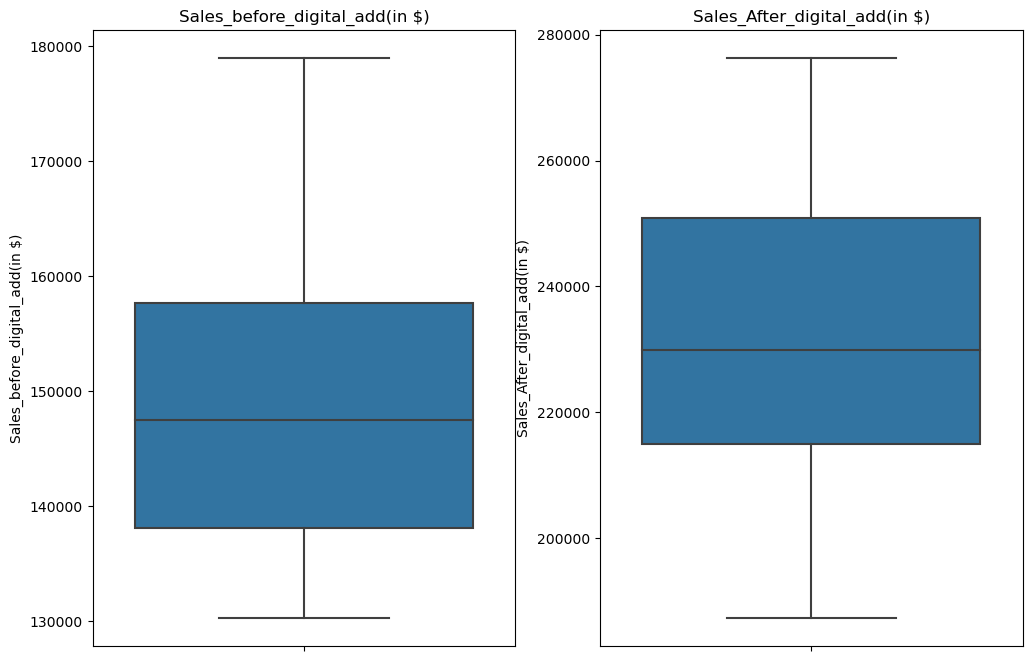

In [15]:
fig, (ax0,ax1) = plt.subplots(figsize = (12,8), nrows=1, ncols=2)

sns.boxplot( y = "Sales_before_digital_add(in $)", data =sales_data, ax = ax0)
ax0.set(title = "Sales_before_digital_add(in $)")
sns.boxplot( y = "Sales_After_digital_add(in $)", data =sales_data, ax = ax1)
ax1.set(title = "Sales_After_digital_add(in $)")

** from the above, no outliers were present.

# 2 a)CASE1
For finding there is any increase in sales after stepping into digital marketing.
We will be performing this study in 4 steps:

STEP 1
Define the Null and Alternate Hypothesis and set the Significance level.

Null Hypothesis:
Ho : Sales after digital advertising will be less than or equal to the sales before digital advertising.

Alternate Hypothesis:
HA : Sales after digital advertising will be greater than the sales before digital advertising.

The Confidence level for this test = 95% and the level of Significance,alpha = 0.05.

STEP 2
calculate t-score and p-value

In [43]:
sales_before = sales_data[["Sales_before_digital_add(in $)"]]

sales_after = sales_data[["Sales_After_digital_add(in $)"]]

#conducting a 1 tail t TEST at alpha =0.05 and t-critical = 1.721 with dof =21( degree of freedom = n-1, 22-1 =21)

t_score, p = stats.ttest_rel(sales_after,sales_before, alternative="greater")
print("The Test statistic scores are \n t-score:", t_score)
print("p value",p)


The Test statistic scores are 
 t-score: [12.09070525]
p value [3.1683335e-11]


STEP 3

Calculate t-score with the critical value of t at 0.05 level of significance(t_critical = 1.721).

In [32]:
t_critical = 1.721
if t_score > t_critical:
    print("\nReject the Null Hypothesis\n\n")
elif t_score <= t_critical:
    print("\nDon't reject the Null Hypothesis\n")


Reject the Null Hypothesis




STEP 4
#From the above Testing we can reach to the following about our Hypothesis:

As the calculated t-score > critical t-score value (significance level at 5% or 0.05),REJECT NULL HYPOTHESIS.
We can say that there is a significant increase in sales after doing Digital advertisements.


# 2 b) CASE 2

Checking whether there is any dependency between the features “Region” and “Manager”
Same as the previous case we'll follow a similar procedure.
STEP 1

Define the Null and Alternate Hypothesis and set the Significance level.

Null Hypothesis:
Ho : There is NO significant dependency between the Region and the Manager features.

Alternate Hypothesis:
HA : There is a significant amount of dependency between the Region and the Manager features.

The Confidence level for this test will be 95% & set the level of Significance as alpha = 0.05.

STEP 2

In [31]:
# Extracting the Required Features, performing a crosstab on them and assigning it to a new variable
data_crosstab = pd.crosstab(sales_data["Region"],sales_data["Manager"])
data_crosstab

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


STEP 3

In [44]:
stat, p, dof, expected = chi2_contingency(data_crosstab)

print("The Test chi-square value is :",stat)
print("\nThe p-Value is :",p )
print("\nThe Degree of freedom is :",dof)

chi2_critical = 9.488 # the chi2 value at alpha = 0.05 and dof = 4

if stat > chi2_critical:
    print("Reject the Null Hypothesis")
elif stat < chi2_critical:
    print ("Do not Reject the Null Hypothesis")

The Test chi-square value is : 3.050566893424036

The p-Value is : 0.5493991051158094

The Degree of freedom is : 4
Do not Reject the Null Hypothesis


STEP 4

From the above Testing we can reach to following about the Hypothesis:

The calculated chi2 value < Critical chi2 value at 0.05 significance level and the calculated p-value > 0.05.
Hence,we can conclude that there is no significant relationship between the features Regions and Managers.

**Overall Conclusion from the Study conducted can be Summerized as
1)There is significant amount of increase in sales generated after the company started investing in Digital Marketing.
2)There is not significant dependency between the Regions and the Managers associated with the regions.